# Clustering

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import acquire
import wrangle_mall
import os
from env import host, username, password

<div class="alert alert-block alert-success">
<b>Takeaways:</b>
    <br>

# Data Wrangling

In [2]:
def acquire_mall_customers():
    
    if os.path.isfile('mall_customers.csv'):
        
        df = pd.read_csv('mall_customers.csv')
        df = df.drop(columns='Unnamed: 0')

        return df

    else:
        
        url = get_connection('mall_customers')
        query = '''
                 SELECT *
                 FROM customers;
                 '''
        df = pd.read_sql(query, url)                
        df.to_csv('mall_customers.csv')

        return df

In [27]:
df = acquire.acquire_mall_customers()

In [28]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df['gender'].value_counts()

Female    112
Male       88
Name: gender, dtype: int64

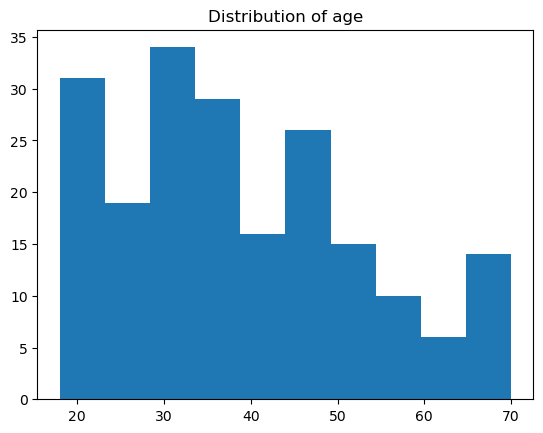

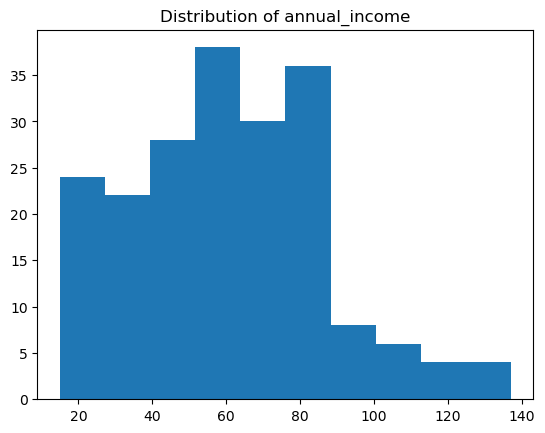

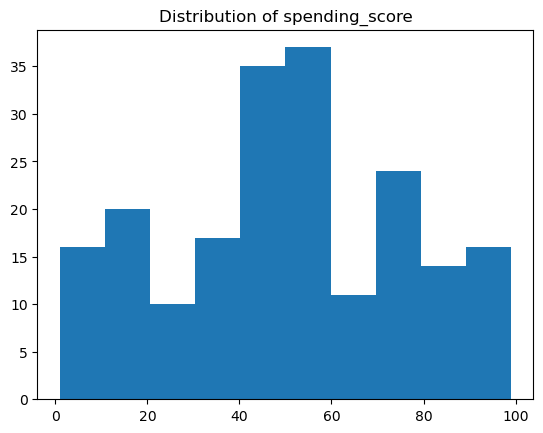

In [11]:
num_cols = ['age', 'annual_income', 'spending_score']

for col in num_cols:
    
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [20]:
def upper_outlier_detector(df, col, k):
    
    q1, q3 = df[col].quantile([.25, .75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + k * iqr
    
    return np.where(df[col] > upper_bound, 1, 0)

In [21]:
my_list = ['age', 'annual_income']

for col in df:
    
    df[f'{col}_upper_outliers'] = upper_outlier_detector(df, col, 1.5)
    
df.head()

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0


In [22]:
df[['age_upper_outliers', 'annual_income_upper_outliers']].sum()

age_upper_outliers              0
annual_income_upper_outliers    2
dtype: int64

In [25]:
df[df['annual_income_upper_outliers'] == 1]

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
198,199,Male,32,137,18,0,1
199,200,Male,30,137,83,0,1


In [26]:
df['annual_income'].mean()

60.56

# Exploring

- Build visuals to help us know what questions to ask.

- Identify trends in the data.

- Gain understanding of the topic and business industry 

- Help construct a story for the data

- Visualize the character of your data, for example normality

- Prioritize features, learn which ones may have the most influence

- Identify shortcomings in the data

- Learn ways to combine features

- Guide the recommendations shared with others 

## Questions about the mall dataset?

- Which gender has a higher spending score?

- Age and income; does income increase with age?

- Which gender has a higher annual income?

- Are annual income and spending score correlated?



In [34]:
train, validate, test = wrangle_mall.wrangle_mall_df()

(118, 6) (40, 6) (40, 6)


<AxesSubplot:xlabel='gender_Male', ylabel='spending_score'>

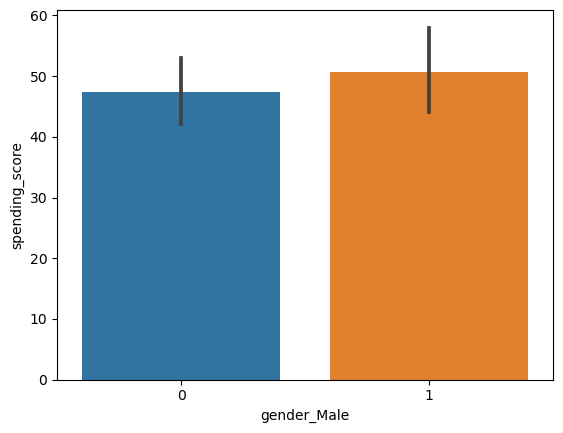

In [37]:
sns.barplot(data=train, x='gender_Male', y='spending_score')

<AxesSubplot:xlabel='gender_Male', ylabel='spending_score'>

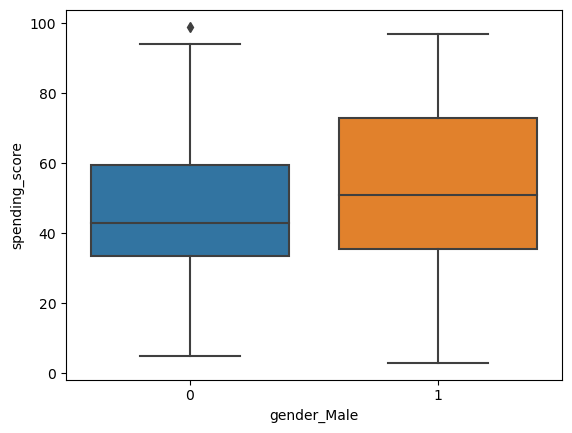

In [38]:
sns.boxplot(data=train, x='gender_Male', y='spending_score')

<div class="alert alert-block alert-info">
<b>Takeaways:</b> 
    
- Median spending score is the same between the genders; there is a slightly higher average spending score for women.

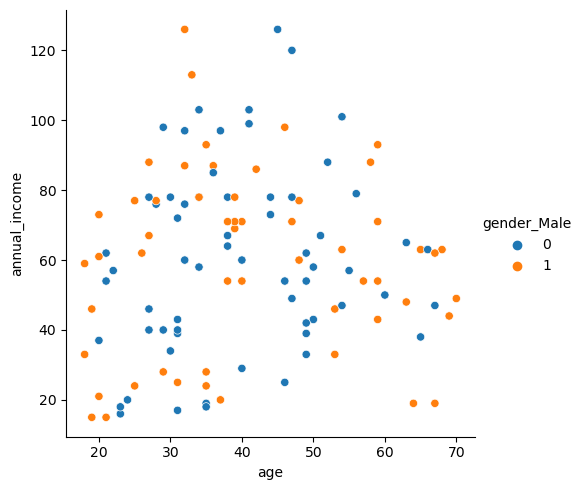

In [39]:
sns.relplot(data=train, x='age', y='annual_income', hue='gender_Male')

<div class="alert alert-block alert-info">
<b>Takeaways:</b> 
    
- Annual income appears to increase slightly with age
    
- Highest earners in the dataset are between 30 and 50 years old

Is there a correlation between annual income and spending score?


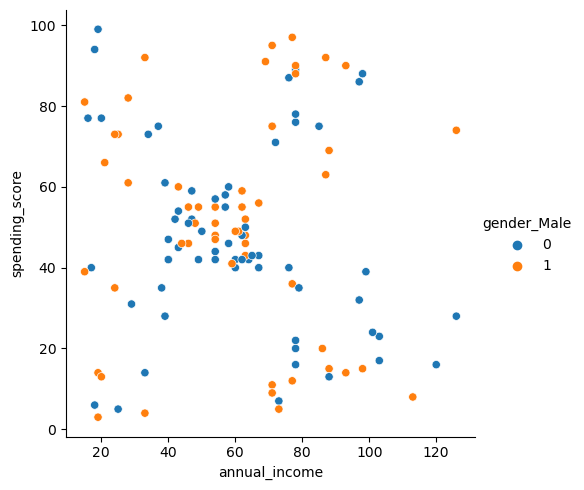

In [40]:
sns.relplot(data=train, x='annual_income', y='spending_score', hue='gender_Male')

<div class="alert alert-block alert-info">
<b>Takeaways:</b> 
    
- Annual income is not able to predict spending score
    
- There are many categories of spenders:
    
    - Low income low spend
    
    - Low income high spend
    
    - Moderate income and spending
    
    - High income low spend
    
    - High income high spend